In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import descartes
import geopandas as gpd
from shapely.geometry import Point, Polygon

#plotting settings
sns.set()
%matplotlib inline
# Display
pd.set_option('display.max_rows', 9999999999)
pd.set_option('display.max_columns', 9999999999)
pd.set_option('display.width', 9999999999)

In [90]:
ds = pd.read_csv('./csse_covid_19_data/csse_covid_19_daily_reports/02-25-2020.csv')
ds.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,Hubei,Mainland China,2020-02-25T15:23:04,64786,2563,18971
1,Guangdong,Mainland China,2020-02-25T08:53:02,1347,7,822
2,Henan,Mainland China,2020-02-25T12:43:02,1271,19,1002
3,Zhejiang,Mainland China,2020-02-25T09:13:05,1205,1,808
4,Hunan,Mainland China,2020-02-25T15:03:05,1016,4,768


In [91]:
ds1 = pd.read_csv('./csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv')
ds1.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20
0,Anhui,Mainland China,31.82571,117.2264,1,9,15,39,60,70,106,152,200,237,297,340,408,480,530,591,665,733,779,830,860,889,910,934,950,962,973,982,986,987,988,989,989,989,989
1,Beijing,Mainland China,40.18238,116.4142,14,22,36,41,68,80,91,111,114,139,168,191,212,228,253,274,297,315,326,337,342,352,366,372,375,380,381,387,393,395,396,399,399,399,400
2,Chongqing,Mainland China,30.05718,107.8740,6,9,27,57,75,110,132,147,182,211,247,300,337,366,389,411,426,428,468,486,505,518,529,537,544,551,553,555,560,567,572,573,575,576,576
3,Fujian,Mainland China,26.07783,117.9895,1,5,10,18,35,59,80,84,101,120,144,159,179,194,205,215,224,239,250,261,267,272,279,281,285,287,290,292,293,293,293,293,293,293,294
4,Gansu,Mainland China,36.06110,103.8343,0,2,2,4,7,14,19,24,26,29,40,51,55,57,62,62,67,79,83,83,86,87,90,90,90,90,91,91,91,91,91,91,91,91,91


In [92]:
ds1.isnull().sum()

Province/State    32
Country/Region     0
Lat                0
Long               0
1/22/20            0
1/23/20            0
1/24/20            0
1/25/20            0
1/26/20            0
1/27/20            0
1/28/20            0
1/29/20            0
1/30/20            0
1/31/20            0
2/1/20             0
2/2/20             0
2/3/20             0
2/4/20             0
2/5/20             0
2/6/20             0
2/7/20             0
2/8/20             0
2/9/20             0
2/10/20            0
2/11/20            0
2/12/20            0
2/13/20            0
2/14/20            0
2/15/20            0
2/16/20            0
2/17/20            0
2/18/20            0
2/19/20            0
2/20/20            0
2/21/20            0
2/22/20            0
2/23/20            0
2/24/20            0
2/25/20            0
dtype: int64

In [93]:
ds1_filter = pd.DataFrame(ds1, columns=['Province/State','Lat','Long'])
ds1_filter.head()

,Province/State,Lat,Long
0,Anhui,31.82571,117.2264
1,Beijing,40.18238,116.4142
2,Chongqing,30.05718,107.8740
3,Fujian,26.07783,117.9895
4,Gansu,36.06110,103.8343


In [94]:
ds2 = ds.merge(ds1_filter, on='Province/State', how='outer')
ds2.head()

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,Hubei,Mainland China,2020-02-25T15:23:04,64786,2563,18971,30.97564,112.2707
1,Guangdong,Mainland China,2020-02-25T08:53:02,1347,7,822,23.33841,113.4220
2,Henan,Mainland China,2020-02-25T12:43:02,1271,19,1002,33.88202,113.6140
3,Zhejiang,Mainland China,2020-02-25T09:13:05,1205,1,808,29.18251,120.0985
4,Hunan,Mainland China,2020-02-25T15:03:05,1016,4,768,27.61041,111.7088


In [95]:
ds2.isnull().sum()

Province/State    1024
Country/Region       0
Last Update          0
Confirmed            0
Deaths               0
Recovered            0
Lat                  0
Long                 0
dtype: int64

In [96]:
ds2.shape

(1088, 8)

In [97]:
ds2.head(999999999)

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
0,Hubei,Mainland China,2020-02-25T15:23:04,64786,2563,18971,30.97564,112.27070
1,Guangdong,Mainland China,2020-02-25T08:53:02,1347,7,822,23.33841,113.42200
2,Henan,Mainland China,2020-02-25T12:43:02,1271,19,1002,33.88202,113.61400
3,Zhejiang,Mainland China,2020-02-25T09:13:05,1205,1,808,29.18251,120.09850
4,Hunan,Mainland China,2020-02-25T15:03:05,1016,4,768,27.61041,111.70880
5,Anhui,Mainland China,2020-02-25T06:33:02,989,6,712,31.82571,117.22640
6,NaN,South Korea,2020-02-25T08:13:19,977,10,22,13.75630,100.50180
7,NaN,South Korea,2020-02-25T08:13:19,977,10,22,35.67620,139.65030
8,NaN,South Korea,2020-02-25T08:13:19,977,10,22,37.56650,126.97800
9,NaN,South Korea,2020-02-25T08:13:19,977,10,22,1.35210,103.81980


In [98]:
ds2.describe(include = 'all')

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long
count,64,1088,1088,1088.000000,1088.000000,1088.000000,1088.000000,1088.000000
unique,61,42,62,NaN,NaN,NaN,NaN,NaN
top,From Diamond Princess,Switzerland,2020-02-25T18:55:32,NaN,NaN,NaN,NaN,NaN
freq,4,32,129,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,126.629596,3.600184,31.460478,32.527725,55.021955
std,NaN,NaN,NaN,1971.752032,77.746416,578.564711,16.427221,48.805166
min,NaN,NaN,NaN,0.000000,0.000000,0.000000,-37.813600,-123.869500
25%,NaN,NaN,NaN,1.000000,0.000000,0.000000,21.473500,12.567400
50%,NaN,NaN,NaN,3.000000,0.000000,1.000000,33.000000,53.688000
75%,NaN,NaN,NaN,22.000000,0.000000,11.000000,45.100000,101.975800


In [99]:
codvid_per_country = ds2.pivot_table(index=['Country/Region'], values = ['Confirmed', 'Deaths', 'Recovered'], aggfunc=np.sum)
codvid_per_country

,Confirmed,Deaths,Recovered
Country/Region,,,
Afghanistan,32,0,0
Algeria,32,0,0
Australia,29,0,11
Austria,2,0,0
Bahrain,736,0,0
Belgium,32,0,32
Cambodia,32,0,32
Canada,11,0,3
Croatia,32,0,0


In [100]:
codvid_per_country_top = codvid_per_country.sort_values(by='Deaths', ascending=False).nlargest(20, 'Deaths')

codvid_per_country_top

,Confirmed,Deaths,Recovered
Country/Region,,,
Mainland China,77660,2663,27650
Iran,3040,512,0
Italy,10304,320,32
South Korea,31264,320,704
Japan,5440,32,704
France,448,32,352
Philippines,96,32,32
Others,691,3,0
Hong Kong,84,2,19


In [101]:
codvid_per_country_top['Deaths'].sum()

3917

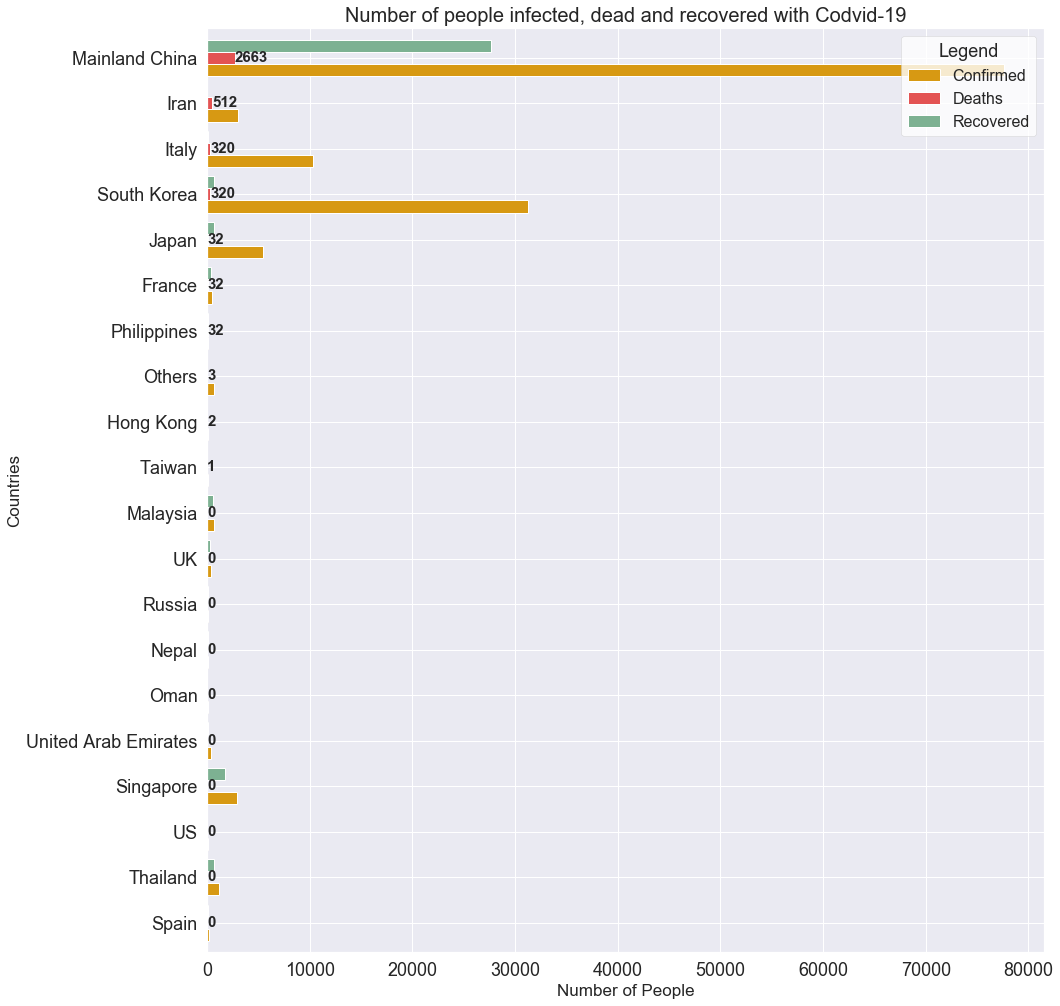

In [102]:
codvid_per_country_top.sort_values(by='Deaths').plot.barh(figsize = (15, 17), width=0.8, align='center', color = ['#D79913', '#E35353', '#7DB192'])

plt.ylabel('Countries', fontsize=17)
plt.xlabel('Number of People', fontsize=17)
plt.title('Number of people infected, dead and recovered with Codvid-19', fontsize=20)
plt.style.use('ggplot')

plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.legend(fontsize=16, loc=1, facecolor = 'white', title = 'Legend', title_fontsize = 18)

#for i, v in enumerate(sorted(codvid_per_country_top['Confirmed'])):
 #   plt.text(v, i, str(round(v,1)), va='center', fontsize=15, fontweight='bold')

for i, v in enumerate(sorted(codvid_per_country_top['Deaths'])):
    plt.text(v, i, str(round(v,0)), va='center', fontsize=15, fontweight='bold')

#for i, v in enumerate(sorted(codvid_per_country_top['Recovered'])):
 #   plt.text(v, i, str(round(v,1)), va='center', fontsize=15, fontweight='bold')
    
plt.savefig('codvid_global.jpg', dpi=480)
plt.show()

In [114]:
world_map = gpd.read_file('./Countries_WGS84/Countries_WGS84.shp')


In [115]:
# designate coordinate system
crs = {'init' :'epsg:4326'}
# zip x and y coordinates into single feature
location = [Point(xy) for xy in zip(ds2['Long'], ds2['Lat'])]
# create GeoPandas dataframe
geo_df = gpd.GeoDataFrame(ds2, crs = crs, geometry = location)

In [116]:
geo_df

,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered,Lat,Long,geometry
0,Hubei,Mainland China,2020-02-25T15:23:04,64786,2563,18971,30.97564,112.27070,POINT (112.27070 30.97564)
1,Guangdong,Mainland China,2020-02-25T08:53:02,1347,7,822,23.33841,113.42200,POINT (113.42200 23.33841)
2,Henan,Mainland China,2020-02-25T12:43:02,1271,19,1002,33.88202,113.61400,POINT (113.61400 33.88202)
3,Zhejiang,Mainland China,2020-02-25T09:13:05,1205,1,808,29.18251,120.09850,POINT (120.09850 29.18251)
4,Hunan,Mainland China,2020-02-25T15:03:05,1016,4,768,27.61041,111.70880,POINT (111.70880 27.61041)
5,Anhui,Mainland China,2020-02-25T06:33:02,989,6,712,31.82571,117.22640,POINT (117.22640 31.82571)
6,NaN,South Korea,2020-02-25T08:13:19,977,10,22,13.75630,100.50180,POINT (100.50180 13.75630)
7,NaN,South Korea,2020-02-25T08:13:19,977,10,22,35.67620,139.65030,POINT (139.65030 35.67620)
8,NaN,South Korea,2020-02-25T08:13:19,977,10,22,37.56650,126.97800,POINT (126.97800 37.56650)
9,NaN,South Korea,2020-02-25T08:13:19,977,10,22,1.35210,103.81980,POINT (103.81980 1.35210)


In [118]:
geo_df1 = geo_df.pivot_table(index=['Province/State'], values = ['Confirmed', 'Deaths', 'Recovered','geometry'])
geo_df1

,Confirmed,Deaths,Recovered
Province/State,,,
Anhui,989,6,712
Beijing,400,4,215
"Boston, MA",1,0,0
British Columbia,7,0,0
"Chicago, IL",2,0,2
Chongqing,576,6,372
Diamond Princess cruise ship,691,3,0
From Diamond Princess,4,0,0
Fujian,294,1,199


/Applications/anaconda3/lib/python3.7/site-packages/geopandas/plotting.py:509: UserWarning: Only specify one of 'column' or 'color'. Using 'color'.
  "Only specify one of 'column' or 'color'. Using 'color'.", UserWarning


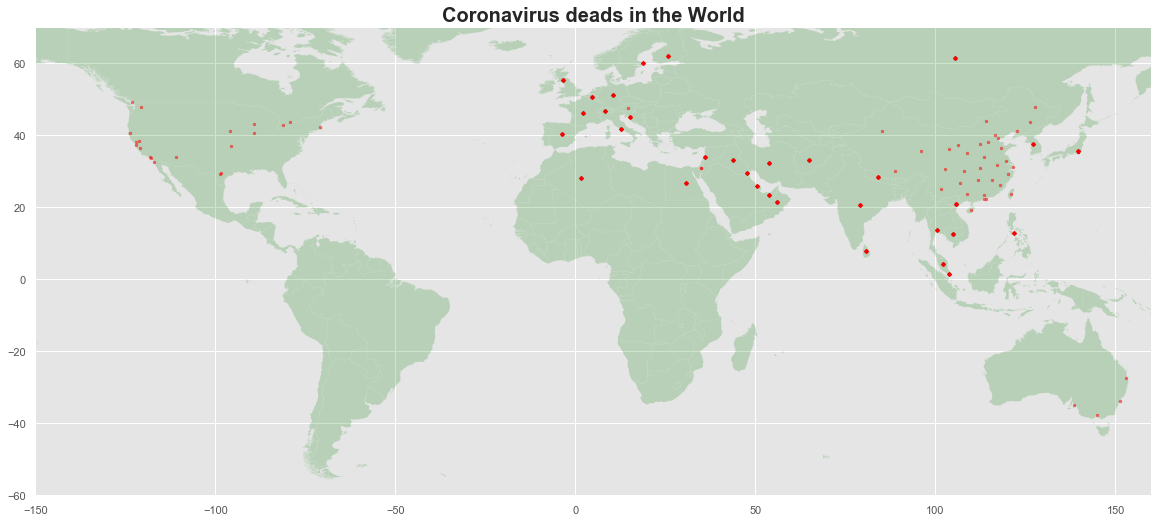

In [137]:
# create figure and axes, assign to subplot
fig, ax = plt.subplots(figsize=(20,15))
world_map.plot(ax=ax, alpha=0.2,color='green')

#geo_df.plot(column='Confirmed', ax=ax, alpha=0.5, marker='o', color='blue', markersize=15)
geo_df.plot(column='Deaths', ax=ax, alpha=0.5, marker='o', color='red', markersize=8)
#geo_df.plot(column='Recovered', ax=ax, alpha=0.5, marker='o', color='green', markersize=15)

plt.xlim(-150, 160)
plt.ylim(-60,70)
plt.title('Coronavirus deads in the World', fontsize=20, fontweight='bold')

plt.savefig('codvid_global_map.jpg', dpi=480)
plt.show()